In [34]:
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [35]:
#Read the csv file
bikes=pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [36]:
bikes.shape

(730, 16)

In [37]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [38]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


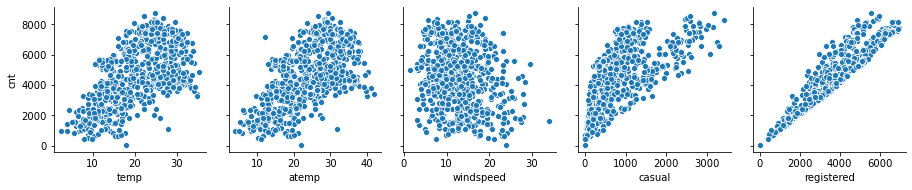

In [39]:
#Data visualisation 
sns.pairplot(data=bikes,x_vars=['temp','atemp','windspeed','casual','registered'],y_vars='cnt')

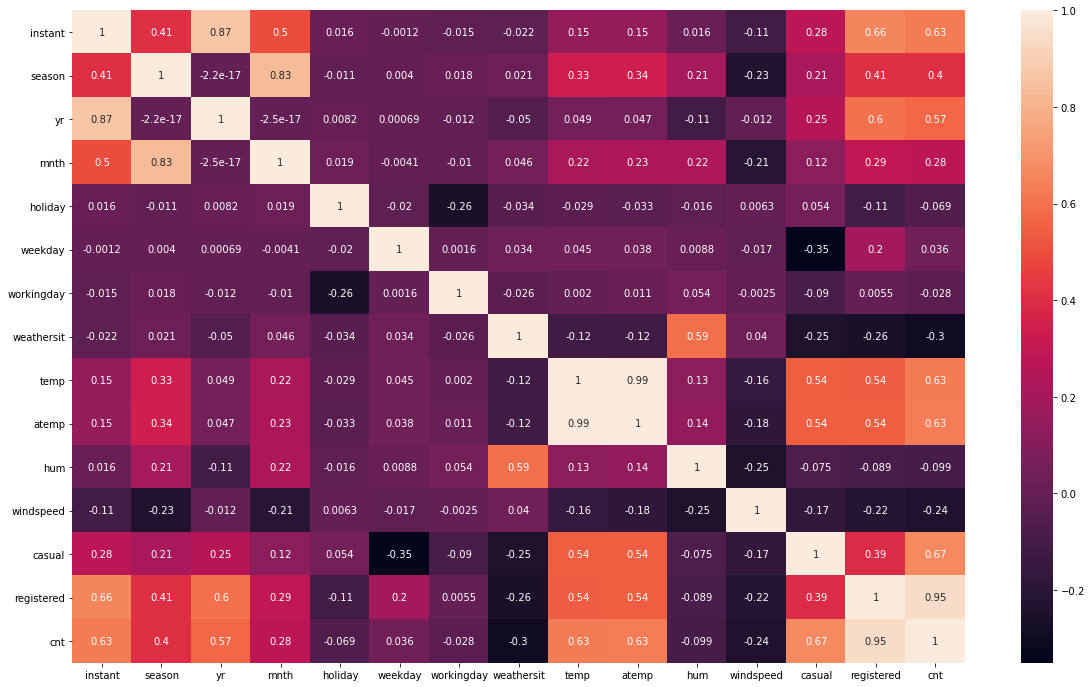

In [40]:
#visualise the columns  for all columns  in the data set
plt.figure(figsize=(20,12))
sns.heatmap(data=bikes.corr(),annot=True)
plt.show()

In [41]:
##Data Preeparation
##Changing the season values which is in numerical to categorical variable
##Seasons 1-->Spring,2-->Summer,3-->Fall,4-->Winter
bikes['season']=bikes['season'].replace(1,"spring").replace(2,"summer").replace(3,"fall").replace(4,"winter")

bikes.season.value_counts(normalize=True)

fall      0.257534
summer    0.252055
spring    0.246575
winter    0.243836
Name: season, dtype: float64

In [42]:
##Data Prepartion
#Convert mnth
bikes.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bikes.mnth.value_counts(normalize=True)

May    0.084932
Jul    0.084932
Mar    0.084932
Aug    0.084932
Oct    0.084932
Jan    0.084932
Dec    0.084932
Sep    0.082192
Apr    0.082192
Jun    0.082192
Nov    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [43]:
## Changing weathersit to categorical variables

#Converting weathersit
bikes.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bikes.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [44]:
#Converting weekday
bikes.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bikes.weekday.value_counts(normalize=True)

Monday       0.143836
Tuesday      0.143836
Friday       0.142466
Sunday       0.142466
Thursday     0.142466
Saturday     0.142466
Wednesday    0.142466
Name: weekday, dtype: float64

In [45]:
##Rounding the temperature,humidity,atemp,casual values to 2 decimal points
bikes=bikes.round({"temp":2, "atemp":2, "hum":2, "windspeed":2}) 
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Monday,1,Misty,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tuesday,1,Misty,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thursday,1,Clear,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Friday,1,Clear,9.31,11.46,43.70,12.52,82,1518,1600


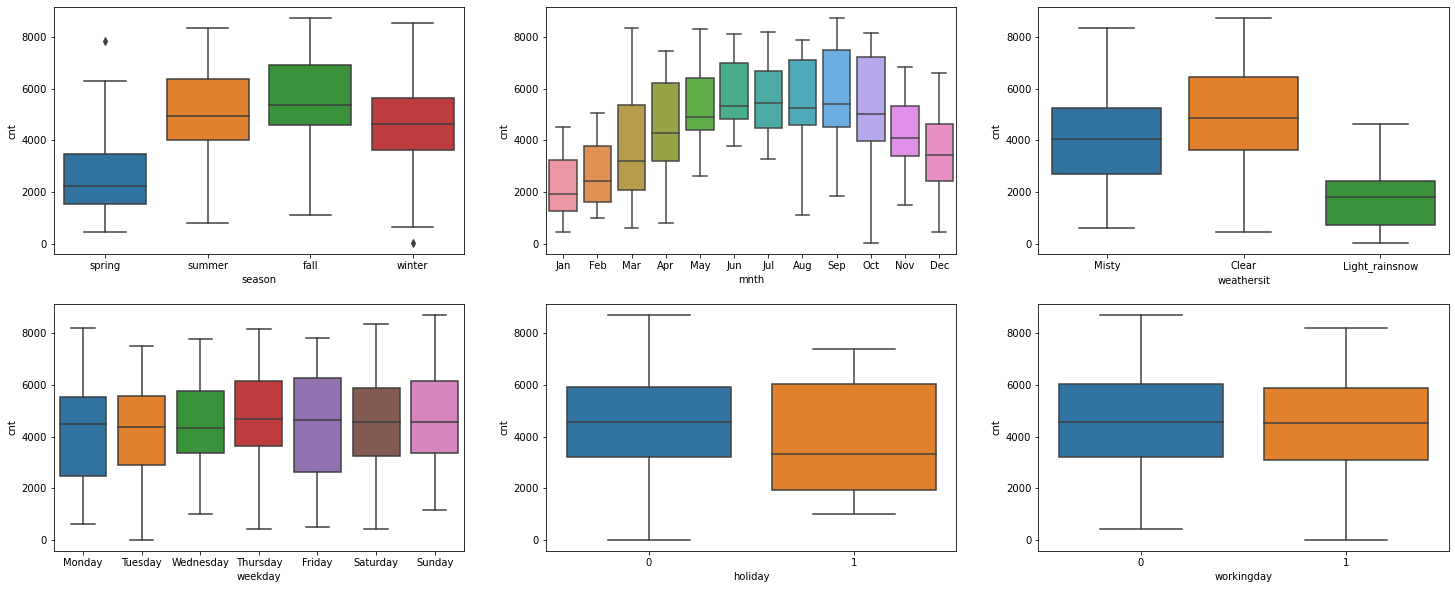

In [46]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.show()

In [47]:
# function to generate statistics related to Categorical Variables
def categorical_stats(col):
    cat_df = bikes.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bikes.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/bikes.cnt.count()*100
    return round(cat_df,2)


In [48]:
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=bikes)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=bikes, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

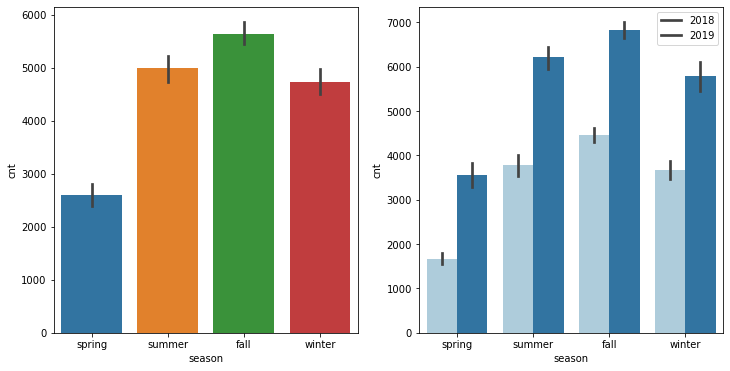

In [49]:
categorical_plot('season',12,6)

In [50]:
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


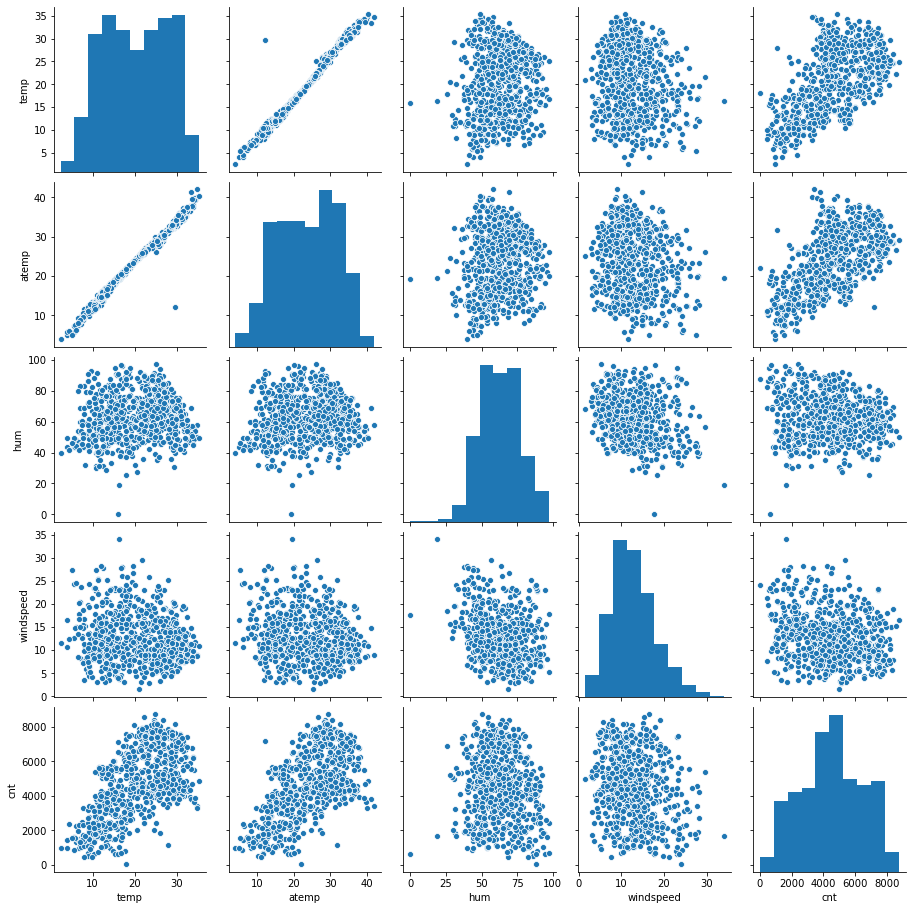

In [51]:
##Numerical Variable Analysis
#Generating pairplot to check the relationships between numeric variables variables
bikes_num = bikes[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bikes_num)
plt.show()

In [52]:
season = pd.get_dummies(bikes['season'], drop_first = True)
season.head(3)

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0


In [53]:
month = pd.get_dummies(bikes['mnth'], drop_first = True)
month.head(3)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


In [54]:
weather = pd.get_dummies(bikes['weathersit'], drop_first = True)
weather.head(3)

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0


In [55]:
weekday = pd.get_dummies(bikes['weekday'], drop_first = True)
weekday.head(3)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1


In [56]:
bike_new = pd.concat([bikes,season,month,weather,weekday], axis = 1)
bike_new.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,01-01-2018,spring,0,Jan,0,Monday,1,Misty,14.11,...,0,0,0,1,1,0,0,0,0,0
1,2,02-01-2018,spring,0,Jan,0,Tuesday,1,Misty,14.90,...,0,0,0,1,0,0,0,0,1,0
2,3,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear,8.05,...,0,0,0,0,0,0,0,0,0,1


In [57]:
##deleting the unnecessry column season, mnth, weathersit and weekday as the respective values are already populated as binary columns data
bike_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_new.shape

(730, 34)

In [58]:
##Train and test models
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 100)

In [59]:
bike_train.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,368.680392,0.507843,0.025490,0.711765,20.108353,23.500294,63.123510,12.834980,837.633333,3647.703922,...,0.084314,0.080392,0.029412,0.345098,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,209.596164,0.500429,0.157763,0.453386,7.431551,8.090982,14.153188,5.291927,675.936359,1578.410906,...,0.278131,0.272166,0.169124,0.475867,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,1.000000,0.000000,0.000000,0.000000,2.420000,3.950000,0.000000,2.830000,2.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.250000,0.000000,0.000000,0.000000,13.605000,16.602500,52.270000,9.040000,311.000000,2468.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,373.000000,1.000000,0.000000,1.000000,20.280000,24.135000,63.440000,12.080000,700.000000,3657.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,552.750000,1.000000,0.000000,1.000000,26.620000,30.180000,73.247500,15.750000,1076.250000,4841.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,729.000000,1.000000,1.000000,1.000000,35.330000,42.040000,97.040000,34.000000,3283.000000,6946.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
## Rescalling bike_train dataframe
# Rescaling using MinMaxCcaler
scaler = MinMaxScaler()

In [61]:
##Rescaling
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

bike_train.head(3)

<ipython-input-61-ee90e79e7290>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,577,31-07-2019,1,0,1,0.815254,0.766343,0.725680,0.264678,968,...,0,0,0,0,0,0,0,0,0,1
426,427,03-03-2019,1,0,0,0.442419,0.438960,0.640148,0.255374,956,...,0,0,0,1,0,0,1,0,0,0
728,729,30-12-2019,1,0,1,0.245214,0.200315,0.498042,0.663138,364,...,0,0,0,0,1,0,0,0,0,0


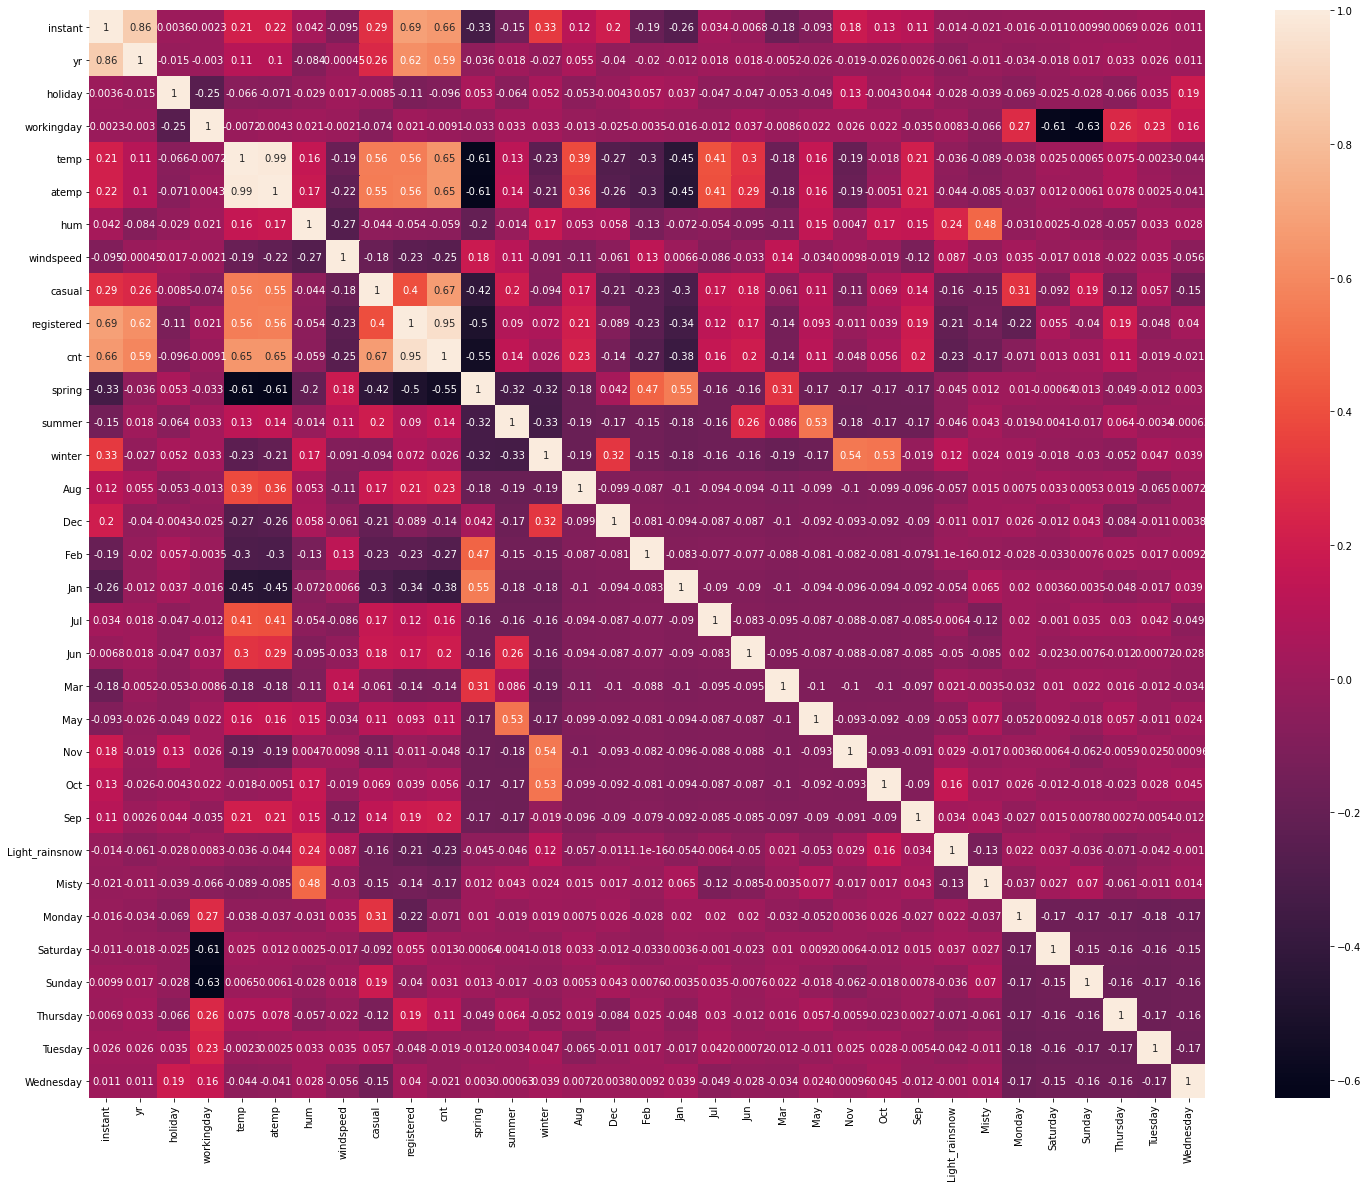

In [62]:
## Checking Correlation Coefficient
plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train.corr(), annot = True)
plt.show()

In [63]:
## Dividing into X_train and y_train
y_train = bike_train.pop('cnt')
X_train = bike_train

In [66]:
# Running RFE with the output number of the variable equal to 15


lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

ValueError: could not convert string to float: '31-07-2019'

In [ ]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [67]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

NameError: name 'rfe' is not defined

In [ ]:

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 


In [ ]:
calculateVIF(X_train_rfe)

In [68]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

NameError: name 'X_train_rfe' is not defined

In [69]:
##MODEL2
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

In [ ]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

In [ ]:
X_train_new = X_train_new.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)


In [ ]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

In [ ]:
##Calculation of R^2
r2 = round(r2_score(y_test, y_pred),4)
r2

In [ ]:
##Adjusted R2 Value Calculation for bike_test dataframe
</span> R2adj=1− 
(1-R2) x (n-1)
(n-p-1)
 </font> </span> </span>
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2
